# K-Nearest Neighbors in depth

## Fecha
-  Marzo 10, 2021

## Integrantes
- **Christian Berdejo Sánchez**
- **Pablo Nieto**
- **Tarek Rababy López**


## Instalar dependencias en el entorno virtual


In [ ]:
#En caso de usar jupiter ejecutar, google colab ya contiene estas librerías
%pip install scikit-learn
%pip install matplotlib
%pip install pandas



In [1]:
#Esta dependencia tampoco la tiene google colab, debe ejecutarse siempre (Repositorio de datasets UCI)
%pip install ucimlrepo

## Importación de Librerías


In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Ejercicio 1:
Describe the dataset in dimensions such as number of features, number of categories, and number of samples per category using Python.

In [3]:
def get_features_and_target(dataset):
    X = dataset.data
    y = dataset.target
    return X, y



In [4]:
def describe_dataset_given_X_y(X, y):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    num_categories = len(np.unique(y))
    samples_per_category = {int(category): int(np.sum(y == category)) for category in np.unique(y)}

    # Usamos numpy para ver los tipos de los features
    unique_feature_types = np.unique([X[:, i].dtype for i in range(X.shape[1])])


    print(f"- Shape of X: {X.shape}")
    print(f"- Shape of y: {y.shape}")

    print(f"- Number of features: {num_features}")
    print(f"- Number of samples: {num_samples}")
    print(f"- Number of categories: {num_categories}")
    print(f"- Samples per category: {samples_per_category}")
    print(f"- Unique feature types: {unique_feature_types}\n")


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
#breast_cancer
data_cancer = load_breast_cancer(return_X_y=False)
X_breast_cancer, y_breast_cancer = get_features_and_target(data_cancer)

#digits
data_digits = load_digits(return_X_y=False)
X_digits, y_digits = get_features_and_target(data_digits)


### Breast Cancer Dataset

In [6]:
print(data_cancer.DESCR)
print("RESUMEN: \n")
describe_dataset_given_X_y(X_breast_cancer, y_breast_cancer)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

 El data ser de cancer de mama tiene 569 muestras y 30 características. Además parece ser que tiene dos categorías (seguramente benigno y maligno). Como vemos el dataset presenta un desbalance, puesto que hay un 212 muestras de una maligno y 357 de benigno. Los features son nº reales y positivos por lo que no se presentan caracteristicas categóricas.



### Digits Dataset

In [7]:
print(data_digits.DESCR)
print("RESUMEN: \n")
describe_dataset_given_X_y(X_digits, y_digits)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Este data set representa imagenes de dígitos escritos a mano del 0 al 9 que corresponde con las categorías del dataset. Los features son pixeles que van del 0 (negro) al 16 (blanco) que se representan en una matrizde características con 64 valores (8x8). El dataset contiene 1797 imágenes en total, cada una representando un dígito. Y para cada dígito tenemos el siguiente nº de muestras:

    - 0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180

---
Podríamos entender mejor el dataset con estos ejemplois de visualización:

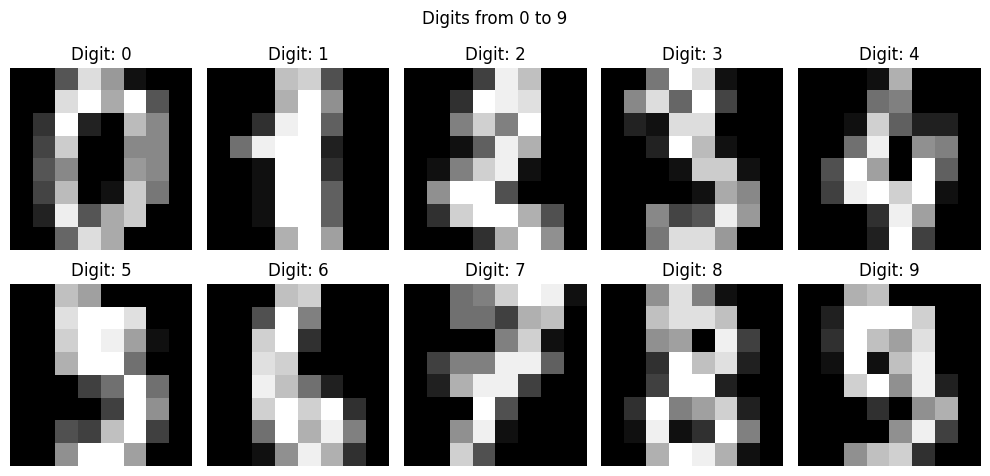

In [8]:
def plot_digits_10(X, y):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Cambia a una cuadrícula 2x5 (10 espacios)
    fig.suptitle('Digits from 0 to 9')

    for i, ax in enumerate(axes.flat):
        index = np.where(y == i)[0][0]  # Encuentra la primera ocurrencia de cada número
        ax.imshow(X[index].reshape(8, 8), cmap='gray')
        ax.set_title(f'Digit: {i}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_digits_10(X_digits, y_digits)

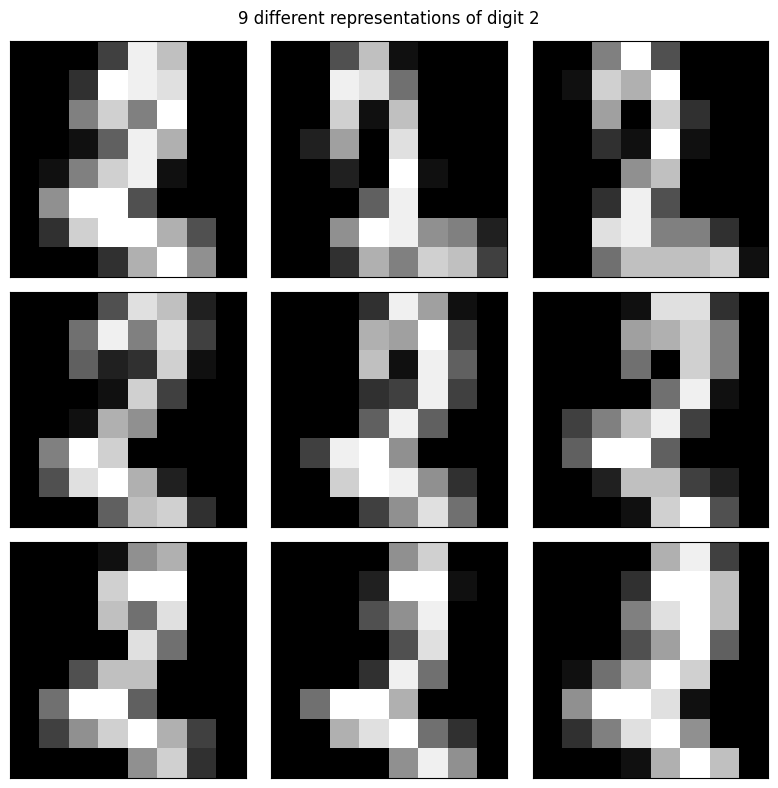

In [9]:
def plot_specific_digit(X, y, digit=2, num_samples=9):
    indices = np.where(y == digit)[0][:num_samples]  # Tomar 9 muestras del número 2

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Crear cuadrícula 3x3
    fig.suptitle(f'9 different representations of digit {digit}')

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[indices[i]].reshape(8, 8), cmap='gray')  # Mostrar imagen
        ax.set_xticks([])  # Ocultar ejes
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

plot_specific_digit(X_digits, y_digits, digit=2, num_samples=9)

## Ejercicio 2:
Represent the statistical support of every feature graphically, resorting to Matplotlib’s boxplot function.
Are there any outliers that can be detected by simple visual inspection? If so, devise a handcrafted
method to detect and isolate such examples.

In [10]:
def plot_boxplots(X, feature_names=None):
    plt.figure(figsize=(20, 10))
    plt.boxplot(X, vert=False, patch_artist=True,)
    plt.title('Boxplot of Features')
    plt.xlabel('Value')
    plt.ylabel('Feature')

    # Añadir nombres a las features
    if feature_names is not None:
        # La longitud de feature_names debe coincidir con el número de características en X
        plt.yticks(ticks=np.arange(1, len(feature_names) + 1), labels=feature_names)

    plt.show()


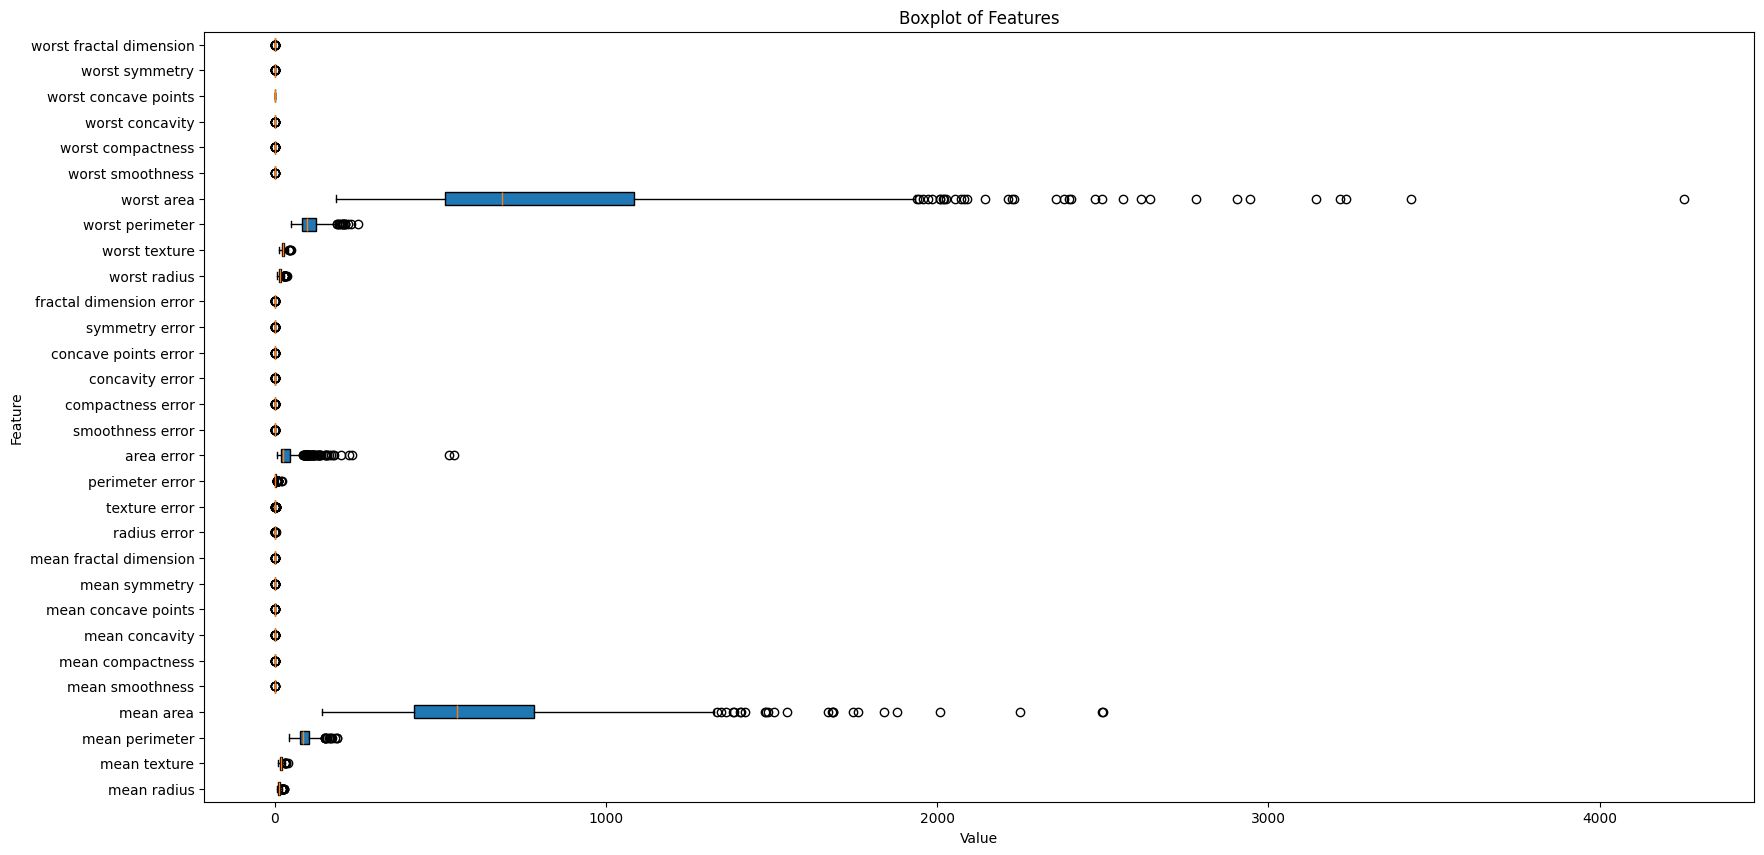

In [11]:
plot_boxplots(X_breast_cancer, feature_names=data_cancer.feature_names)


Debido a las diferentes escalas de los datos, seria interesante normalizar los datos a fin de detectar visualmente aquellos outsiders que quedan ocultos.

In [12]:
from sklearn.preprocessing import MinMaxScaler
def plot_boxplots_Norma(X, feature_names=None):
    # Normalizamos las características
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Graficamos el boxplot de las características normalizadas
    plt.figure(figsize=(20, 10))
    plt.boxplot(X_scaled, vert=False, patch_artist=True)
    plt.title('Boxplot of Features (Normalized)')
    plt.xlabel('Value (Normalized)')
    plt.ylabel('Feature')

    # Añadir nombres a las features
    if feature_names is not None:
        plt.yticks(ticks=np.arange(1, len(feature_names) + 1), labels=feature_names)

    plt.show()

### Breast Cancer Dataset

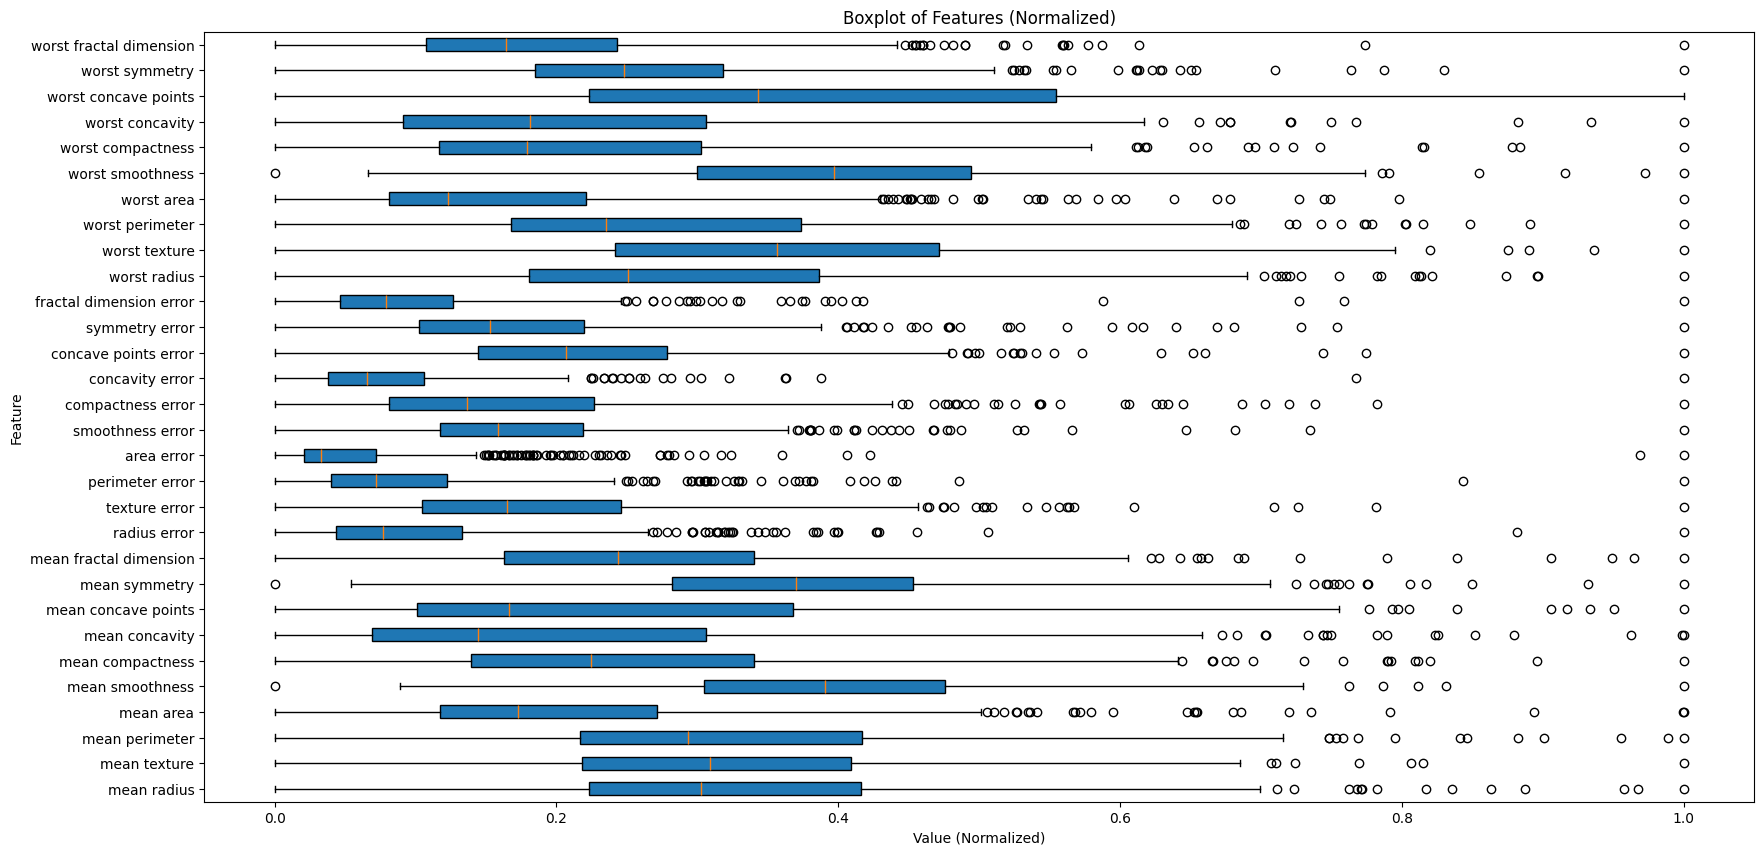

In [13]:
plot_boxplots_Norma(X_breast_cancer, feature_names=data_cancer.feature_names)

### Digits Dataset

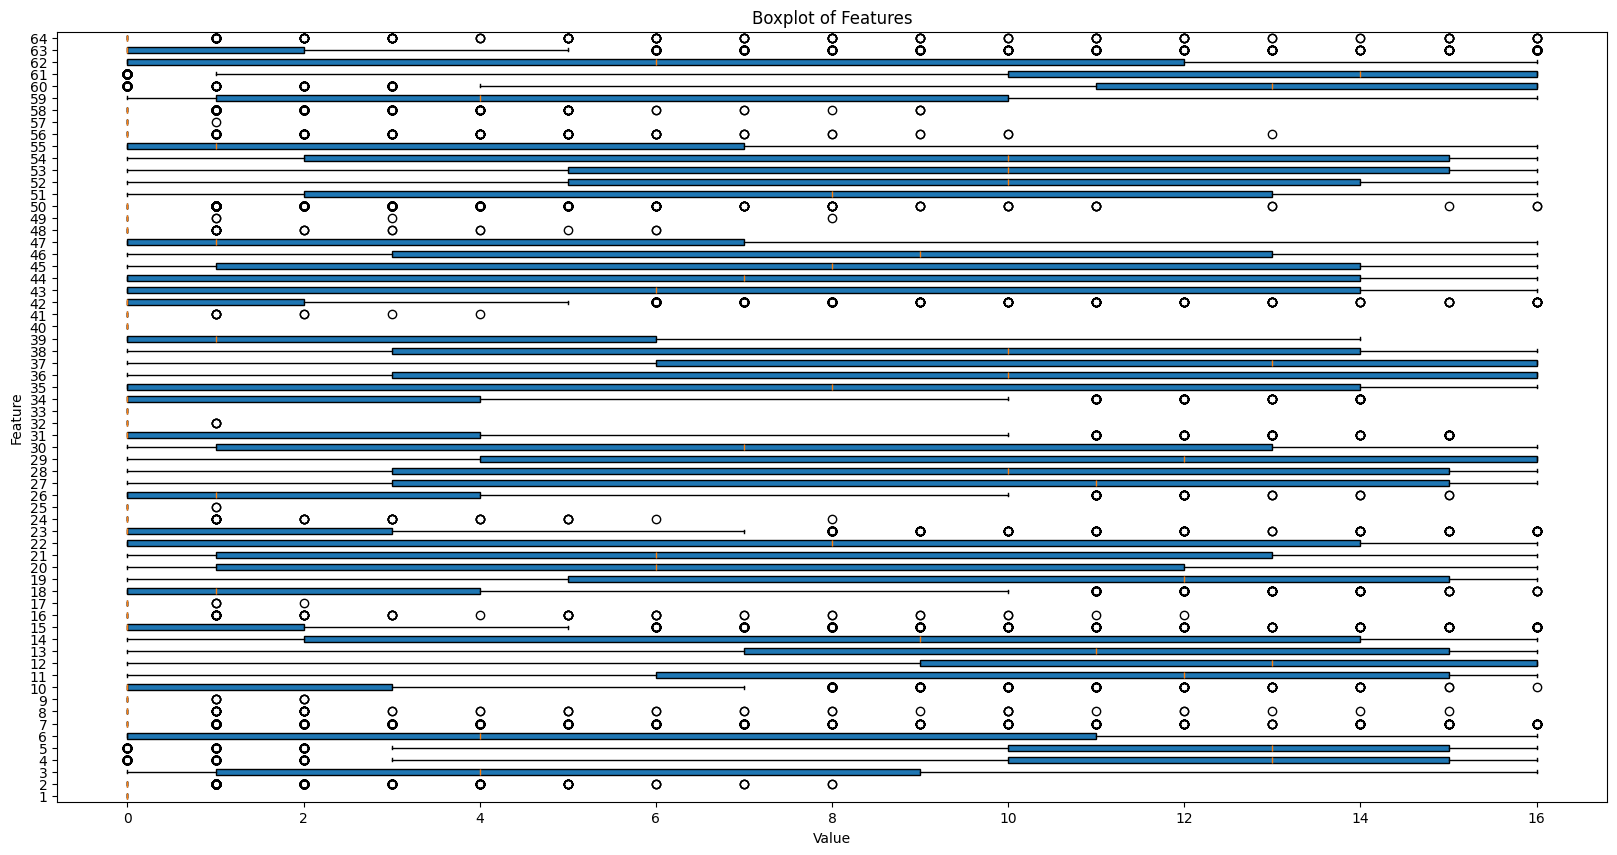

In [14]:
plot_boxplots(X_digits)

### Función para detectar outliers:

Los valores atípicos (outliers) se identifican visualmente como puntos que están fuera de los "bigotes" de la caja. Como vemos son fácilmente identificables features con valores outliers una vez que hemos normalizado los datos.

Podríamos intentar detectar los *outliers* usando la **regla de tukey** que dice:

- Cualquier punto de datos que quedara fuera de o bien 1,5 veces el IQR (rango intercuantil Q3-Q1) por debajo del primer cuartil, o 1,5 veces el IQR por encima del tercer cuartil, estaría fuera o sería lejano. En un diagrama de caja y bigotes, los bigotes se amplían hasta el último punto de datos que no quede fuera.

In [15]:
def detect_outliers_using_tukey(X):
    outliers = {}
    for i in range(X.shape[1]):
        # Calculamos IQR
        Q1 = np.percentile(X[:, i], 25)
        Q3 = np.percentile(X[:, i], 75)
        IQR = Q3 - Q1
        # Obtenemos los límites de los que a partir de ese límite se consideran outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[i] = np.where((X[:, i] < lower_bound) | (X[:, i] > upper_bound))[0]
    return outliers




Se podría  visualizar los puntos obtenidos, pero para hacerse una idea de los puntos, se muestra el nº de outliers por dataset

In [16]:
def plot_outliers(outliers, title, feature_names=None):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.xlabel("Feature Name")
    plt.ylabel("Number of Outliers")
    # Utilizamos los nombres de las features en lugar de los índices
    if feature_names is not None:
      plt.bar(feature_names, [len(v) for v in outliers.values()])
      plt.xticks(rotation=90)  # Para girar las etiquetas si es necesario
    else:
      plt.bar(outliers.keys(), [len(v) for v in outliers.values()])
    plt.show()


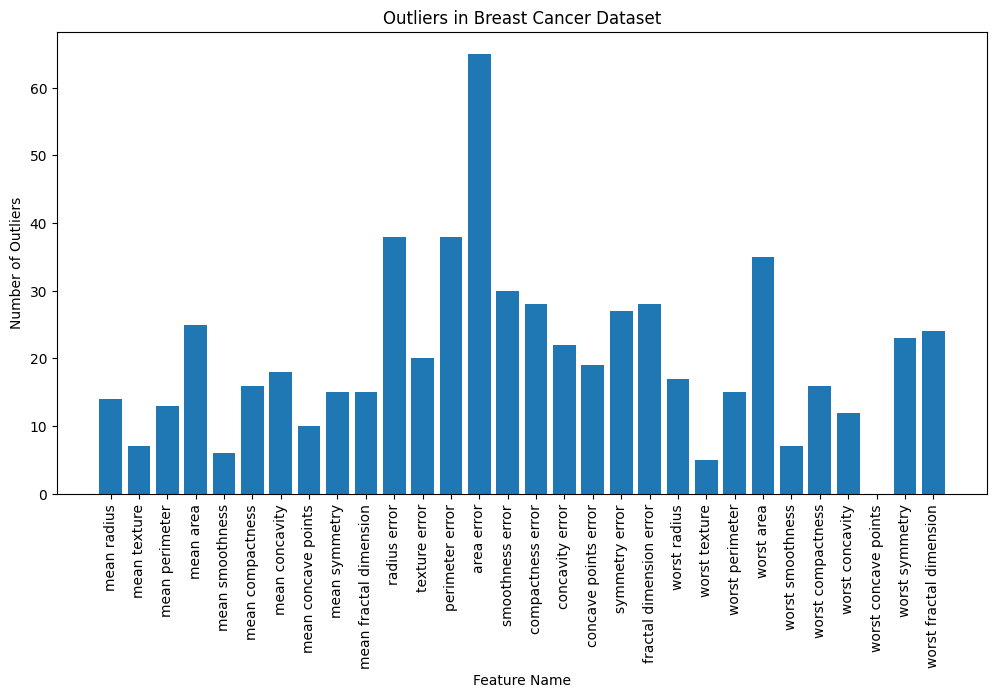

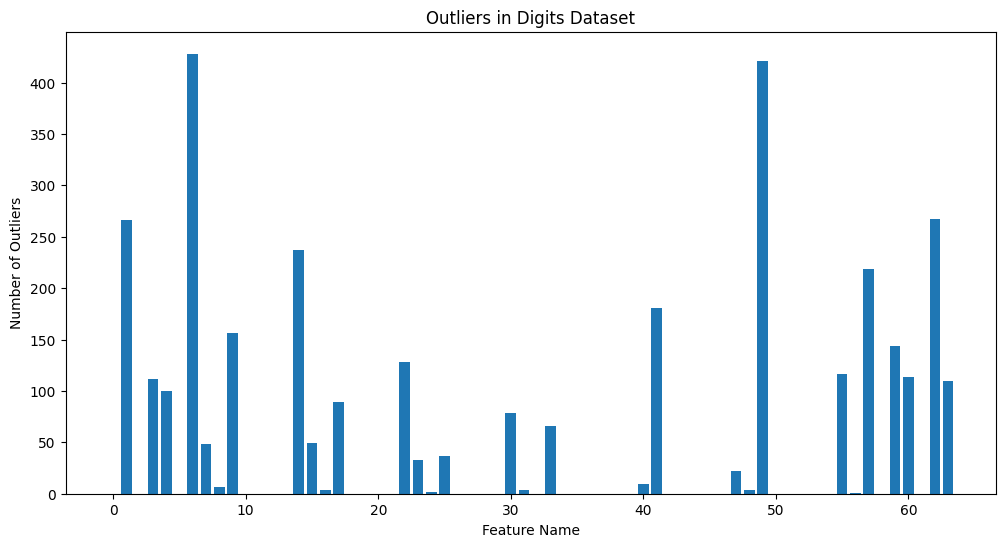

In [17]:

outliers_breast_cancer = detect_outliers_using_tukey(X_breast_cancer)
outliers_digits = detect_outliers_using_tukey(X_digits)


plot_outliers(outliers_breast_cancer, "Outliers in Breast Cancer Dataset", feature_names=data_cancer.feature_names)
plot_outliers(outliers_digits, "Outliers in Digits Dataset")

#### Respuesta:
En el caso de los dígitos no son realmente outliers ya que como hemos visto el dataset es una escala de grises, con lo cual no tendria mucho sentido el analisis. En cambio, en el caso del dataset del cancer de mama se pueden notar algunos atributos con un gran número de outliers como area error.


[Explicar resultados]

## Ejercicio 3:
 Repeat each of the experiments seen in class with the K-Nearest Neighbors model, providing
arguments for each of the steps taken along the process, and commenting on the partial results
obtained with the selected dataset. Please use as many performance metrics as needed to illustrate the
particularities of the selected dataset (e.g. imbalanced classes).

**knn_analysis** es una función que hace lo siguiente:

1. Explora el dataset y muestra estadísticas básicas.
1. Divide los datos en entrenamiento y prueba.
1. Normaliza las características si está habilitado (scale_data=True).
1. Configura el modelo KNN y realiza la búsqueda de los mejores hiperparámetros mediante GridSearchCV.
1. Evalúa el modelo en el conjunto de prueba.
1. Si es un problema binario, muestra métricas adicionales con show_metrics_for_binary_dataset.
1. Genera la matriz de confusión y la grafica.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut,train_test_split
from sklearn.metrics import (classification_report, roc_curve,
                            confusion_matrix, ConfusionMatrixDisplay,
                            precision_recall_curve, auc, roc_auc_score)
from sklearn.preprocessing import StandardScaler

def show_metrics_for_binary_dataset(y_test, y_pred, y_proba):
    """
    Display various evaluation metrics for a binary classification dataset.


    Plots:
    - ROC Curve: A plot of the true positive rate against the false positive rate.
    - Precision-Recall Curve: A plot of precision against recall.
    """

    roc_auc = roc_auc_score(y_test, y_proba)




    print(f"\n Curva Roc y Precision-Recall: ")
    # Curva ROC
    # La curva ROC (Receiver Operating Characteristic) es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de decisión.
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal que representa un clasificador aleatorio
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Curva Precision-Recall
    # La curva Precision-Recall es una representación gráfica que muestra la relación entre la precisión (precision) y el recall para diferentes umbrales de decisión.
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall_vals, precision_vals)  # Área bajo la curva Precision-Recall
    plt.figure()
    plt.plot(recall_vals, precision_vals, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def knn_analysis(X, y, test_size=0.3, random_state=42, scoring='accuracy', cv_folds=5, scale_data=True, leave_one_out=False):

    # **1. Exploración del Dataset**
    print(f"Vista general del dataset: ")
    print(f" - Número de muestras: {X.shape[0]}")
    print(f" - Número de características: {X.shape[1]}")
    print(f" - Clases únicas: {np.unique(y)}\n")
    num_classes = len(np.unique(y))


    #  **2. División del dataset**
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    #  **3. Normalización (Mejora el rendimiento de KNN)**
    if scale_data:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # **4. Inicializamos el modelo
    modelo = KNeighborsClassifier()
    # **5. Hiperparámetros que vamos a verificar**
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    #**6. Selección de estrategia Si leave_one_out está activado, usamos LeaveOneOut como estrategia de CV
    cv_strategy = LeaveOneOut() if leave_one_out else cv_folds

    # **7. Búsqueda por Rejilla con Validación Cruzada**
    grid_search = GridSearchCV(modelo, param_grid, scoring=scoring, cv=cv_strategy, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Resultados de búsqueda por rejilla y validación cruzada: ")
    print(" - Best parameters found: ", grid_search.best_params_)
    print(" - Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

    #  **8. Evaluación del modelo en el conjunto de prueba**
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print("\n Evaluación en conjunto de prueba:")
    print(classification_report(y_test, y_pred))
    # recall, precision y f1 solo tienen sentido si el dataset es binario
    # porque estas métricas se basan en la distinción entre clases positivas y negativas.
    if num_classes == 2:
      y_proba = best_model.predict_proba(X_test)[:, 1]
      show_metrics_for_binary_dataset(y_test, y_pred, y_proba)



    #**9. Matriz de Confusión**
    print("\n Matríz de confusión:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()




### Breast Cancer Dataset

Vista general del dataset: 
 - Número de muestras: 569
 - Número de características: 30
 - Clases únicas: [0 1]

Resultados de búsqueda por rejilla y validación cruzada: 
 - Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
 - Best cross-validation accuracy: 0.9724

 Evaluación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


 Curva Roc y Precision-Recall: 


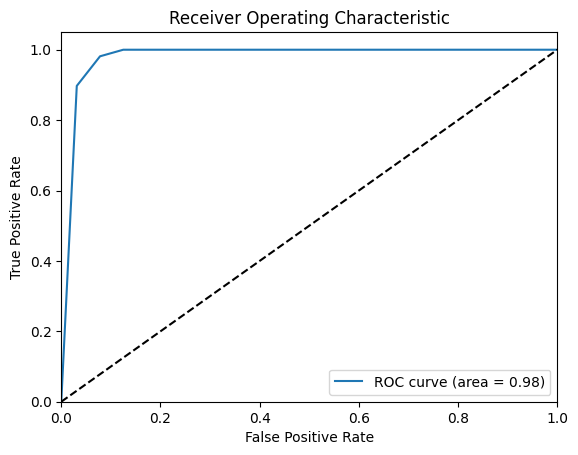

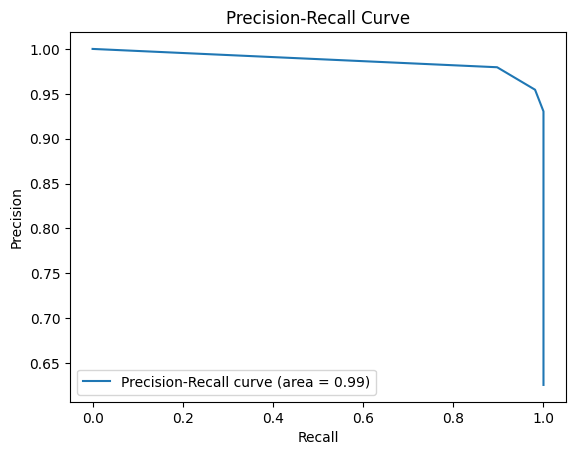


 Matríz de confusión:


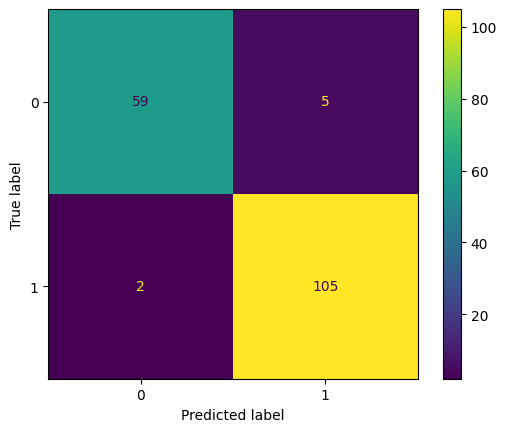

In [19]:
knn_analysis(X_breast_cancer,y_breast_cancer,cv_folds=5)

El estudio de KNN tiene un rendimiento muy sólido. La alta precisión, recall y f1-score, junto con las curvas ROC y Precision-Recall, demuestran que el modelo no solo generaliza bien, sino que también mantiene un buen equilibrio entre la sensibilidad y la especificidad. Pero es lógico ya que el dataset es muy sencillo, balanceado y muy "ideóneo"

### Digits Dataset

Vista general del dataset: 
 - Número de muestras: 1797
 - Número de características: 64
 - Clases únicas: [0 1 2 3 4 5 6 7 8 9]

Resultados de búsqueda por rejilla y validación cruzada: 
 - Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
 - Best cross-validation accuracy: 0.9737

 Evaluación en conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.98      0.96        55
           2       0.98      1.00      0.99        53
           3       0.96      1.00      0.98        55
           4       0.98      0.94      0.96        54
           5       1.00      0.96      0.98        55
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.98      0.90      0.94        52
           9       0.96      0.94      0.95        54

    accuracy                           0.97   

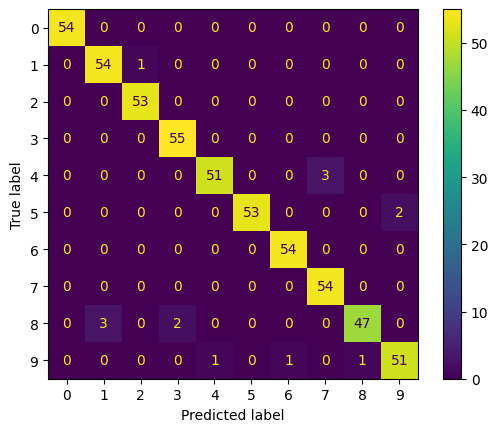

In [20]:
knn_analysis(X_digits,y_digits)

El modelo KNN aplicado a este dataset muestra también un buen rendimiento con una precisión general del 98%.

Los mejores hiperparámetros encontrados, con una métrica de distancia "manhattan", 3 vecinos más cercanos y ponderación por distancia, permiten al modelo obtener una precisión, recall y f1-score cercanos o iguales a 1.00 en la mayoría de las clases.

Estos resultados indican que el modelo  clasifica correctamente los datos en cada una de las categorías, lo que sugiere un ajuste muy adecuado del modelo a este conjunto de datos, que de nuevo es muy sencillo y por eso funciona tan bien.

## Ejercicio 4
Read the Scikit-learn library documentation and configure the automated validation script so that the
GridSearchCV() function uses leave-one-out cross-validation instead of k-fold. Which conclusions can
be drawn from the mean cross-validation scores and the test scores using a k-neighbor model with
optimized k?

### Breast Cancer Dataset

Vista general del dataset: 
 - Número de muestras: 569
 - Número de características: 30
 - Clases únicas: [0 1]

Resultados de búsqueda por rejilla y validación cruzada: 
 - Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
 - Best cross-validation accuracy: 0.9698

 Evaluación en conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        64
           1       0.93      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171


 Curva Roc y Precision-Recall: 


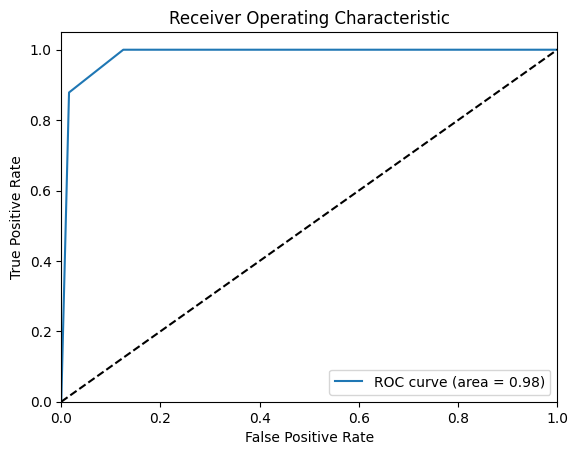

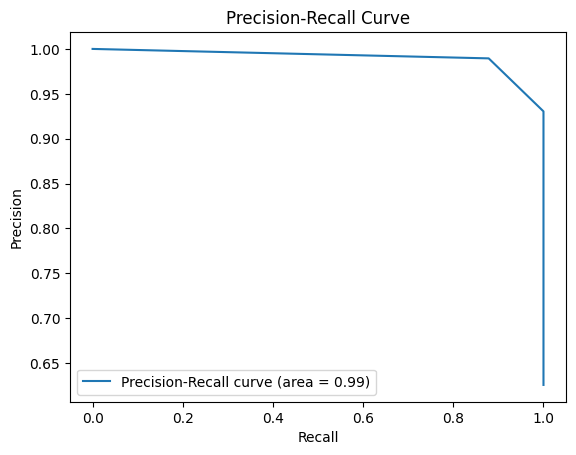


 Matríz de confusión:


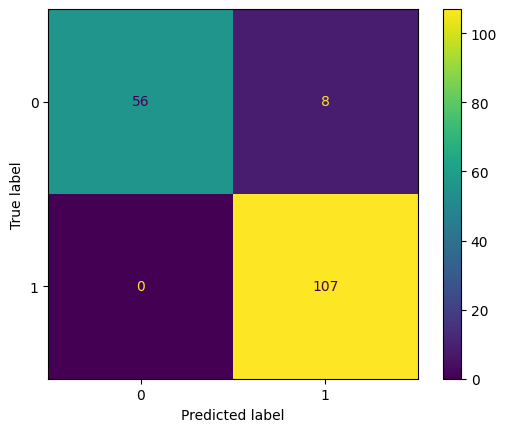

In [21]:
knn_analysis(X_breast_cancer,y_breast_cancer,cv_folds=10,leave_one_out=True)

### Digits Dataset

Vista general del dataset: 
 - Número de muestras: 1797
 - Número de características: 64
 - Clases únicas: [0 1 2 3 4 5 6 7 8 9]

Resultados de búsqueda por rejilla y validación cruzada: 
 - Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
 - Best cross-validation accuracy: 0.9785

 Evaluación en conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.98      0.97        55
           2       0.96      1.00      0.98        53
           3       0.98      1.00      0.99        55
           4       0.98      0.93      0.95        54
           5       0.98      0.96      0.97        55
           6       0.98      1.00      0.99        54
           7       0.93      0.98      0.95        54
           8       0.98      0.92      0.95        52
           9       0.96      0.94      0.95        54

    accuracy                           0.97   

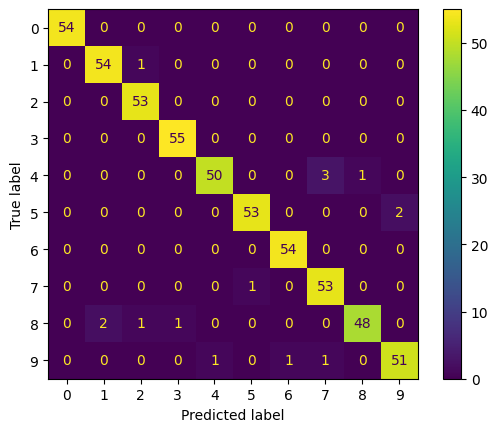

In [22]:
knn_analysis(X_digits,y_digits,leave_one_out=True)

Leave-One-Out CV es una técnica de validación cruzada en la que cada muestra del conjunto de datos se usa como conjunto de prueba una vez, mientras que el resto de los datos se usa para entrenar el modelo. Está técnica puede resultar en  modelos más precisos, reduciendo el sesgo, ya que cada observación se usa tanto para entrenar como para probar.

Sin embargo, Es muy costoso computacionalmente para datasets grandes, ya que se entrena el modelo n veces. Para estos datasets que son pequeños ya se nota la diferencia de tiempo en el entreno, para un dataset grande puede no ser idóneo.

En este caso, el uso de Leave-One-Out CV ha permitido una ligera mejora en la precisión de validación cruzada para ambos datasets. En el primer dataset bread_cancer, la precisión de validación cruzada aumentó de 0.9724 a 0.9736, mientras que en el segundo dataset de dígitos, la precisión mejoró de 0.9784 a 0.9798.

Aunque estas mejoras son muy pequeñas, demuestran que el modelo se beneficia de la evaluación exhaustiva de cada punto de datos como un caso de prueba independiente. Podría tener sentido en datasets similares mas complejos

## Ejercicio 5

Elaborate on the need for stratifying the cross-validation process analyzing the distribution of samples
by class. If so, please show with empirical evidence what could occur if such a stratification was not
performed, specially when decreasing the number of samples of the dataset.

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Crear un dataset desbalanceado y con pocas muestras
X, y = make_classification(n_samples=100, n_features=5, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

# Validación sin estratificación
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_kf = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Validación con estratificación
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_skf = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')

print("Accuracy sin estratificación:", scores_kf)
print("Accuracy con estratificación:", scores_skf)


Accuracy sin estratificación: [1.   0.95 0.95 0.9  1.  ]
Accuracy con estratificación: [0.95 0.95 0.95 0.95 0.95]


La validación cruzada es fundamental para que cada particion (fold) refleje la misma distribución de clases que el conjunto completo. Este paso es especialmente importante cuando el dataset es pequeño o desbalanceado. Esto podría ocasinar que que algun fold se quede con muy pocos (o ningun) ejemplo de una clase minoritaria.
Como se observa en el ejemplo,  el accuracy si estratificar varia según las clases, y en el ejemplo estratificado se mantiene constante.

In [63]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def analysis_stratification(X, y, dataset_name, sample_fraction=None, n_splits=5, random_state=42):

    knn = KNeighborsClassifier(n_neighbors=3)


    print(f"\n{dataset_name}:")

    # Validación sin estratificación
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    acc_kf = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

    # Validación con estratificación
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    acc_skf = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')

    print("Accuracy sin estratificación:", acc_kf)
    print("Accuracy con estratificación:", acc_skf)




In [67]:
#Breast Cancer
analysis_stratification(X_breast_cancer, y_breast_cancer, 'Breast Cancer')
#Digits
analysis_stratification(X_digits, y_digits, 'Digits')

#Breast cancer 30%
indices_bc = np.random.choice(len(y_breast_cancer), size=int(0.3 * len(y_breast_cancer)), replace=False)
X_bc_sub = X_breast_cancer[indices_bc]
y_bc_sub = y_breast_cancer[indices_bc]
analysis_stratification(X_bc_sub, y_bc_sub, 'Breast Cancer (subsample 30%)', sample_fraction=0.3)


Breast Cancer:
Accuracy sin estratificación: [0.92982456 0.94736842 0.88596491 0.92982456 0.90265487]
Accuracy con estratificación: [0.92982456 0.88596491 0.93859649 0.92982456 0.95575221]

Digits:
Accuracy sin estratificación: [0.98333333 0.99166667 0.97214485 0.99721448 0.98885794]
Accuracy con estratificación: [0.99444444 0.99166667 0.98885794 0.98885794 0.98328691]

Breast Cancer (subsample 30%):
Accuracy sin estratificación: [0.88235294 0.85294118 0.88235294 0.91176471 0.85294118]
Accuracy con estratificación: [0.82352941 0.88235294 0.94117647 0.82352941 0.85294118]


Se han realizado sendos analisis para Breast Cancer Dataset, Digits Dataset y una simulación de un subsample de Breast Cancer Dataset con tan solo el 30% de los datos, donde se espera que se vea mas el impacto de la estratificación.

Los resultados en ambos datasets muestran valores de accuracy en rangos similares, aunque los valores de cada fold varían ligeramente de un método a otro. Esto es normal, ya que la división en folds sin estratificar puede ocasionar que algunas particiones tengan una distribución de clases diferente a la global, lo que afecta las métricas en algunos folds.

Se puede observar como la Accuracy con la estratificación muestra valores más cohesionados.

En el dataset Breast Cancer, la diferencia no es muy marcada en el conjunto completo, pero al trabajar con un subsample (30% de los datos) las diferencias tienden a acentuarse, ya que el efecto de una división desbalanceada se hace más relevante con menos datos. Aun así la diferencia no es tan grande como cabria esperar. Esdo puede ser debido a que el conjunto, a persar de ser desbalanceado, no lo es excesivamente.

En el dataset Digits, que tiende a ser más balanceado, la diferencia entre estratificar y no estratificar es aún menor, aunque se aprecian pequeños ajustes en los valores.



## Ejercicio 6
Include in the set of hyper-parameters adjusted via cross-validation process the weights of the distance
metric between samples according to the “weights” parameter of the model in Scikit-learn. Compute
the model’s performance when distance metric weights are fine-tuned within cross-validation with
respect to only tuning the number of neighbors (K).  

---
Nuestro objetivo en este apartado es realizar una prueba para comprobar si influye en algo incluir weigths. Para ello se llevaran a cabo dos experimentos.

- **Experimento A:** Se realiza GridSearchCV ajustando únicamente el número de vecinos (n_neighbors), manteniendo el valor por defecto de weights (que es "uniform").

- **Experimento B:** Se ajusta conjuntamente n_neighbors y weights (entre "uniform" y "distance").
El objetivo es evaluar si incluir weights mejora el desempeño.

In [68]:
from sklearn.pipeline import Pipeline
def perform_grid_search(X_train, y_train, X_test, y_test, param_grid, experiment_name):
    pl = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])
    grid = GridSearchCV(pl, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
    print(f"{experiment_name} - Mejores parámetros: {grid.best_params_}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}\n")




In [69]:
# Experimento A: Solo se ajusta n_neighbors
param_grid_onlyK = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

# Experimento B: Se ajusta n_neighbors y weights
param_grid_K_weights = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}


### Breast Cancer Dataset

In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# División y normalización (ya que KNN es sensible a la escala)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=42, stratify=y_breast_cancer)




perform_grid_search(X_train_bc, y_train_bc, X_test_bc, y_test_bc, param_grid_onlyK, "Breast Cancer")
perform_grid_search(X_train_bc, y_train_bc, X_test_bc, y_test_bc, param_grid_K_weights, "Breast Cancer")

Breast Cancer - Mejores parámetros: {'knn__n_neighbors': 5}
Train Accuracy: 0.9723618090452262
Test Accuracy: 0.9590643274853801

Breast Cancer - Mejores parámetros: {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Train Accuracy: 0.9723618090452262
Test Accuracy: 0.9590643274853801



Se ha procedido a realizar 2 pruebas, la primera solo con el ajuste de n_neighbors y la segunda conn_neighbors y weights. En este caso, al incluir el parámetro weights en el proceso de búsqueda, el modelo selecciona la misma configuración óptima que cuando se ajusta únicamente n_neighbors (es decir, 5 vecinos y peso uniforme). Esto indica que, para el dataset Breast Cancer, ponderar los vecinos según su distancia (opción "distance") no aporta una mejora significativa en la precisión.
El hecho de que ambos experimentos produzcan el mismo mejor parámetro es una evidencia de que, en este caso, el ajuste del parámetro weights no aporta mejoras adicionales al rendimiento.

### Digits Dataset

In [71]:
# División y normalización
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42, stratify=y_digits)

perform_grid_search(X_train_d, y_train_d, X_test_d, y_test_d, param_grid_onlyK, "Digits")
perform_grid_search(X_train_d, y_train_d, X_test_d, y_test_d, param_grid_K_weights, "Digits")

Digits - Mejores parámetros: {'knn__n_neighbors': 3}
Train Accuracy: 0.9880668257756563
Test Accuracy: 0.9722222222222222

Digits - Mejores parámetros: {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Train Accuracy: 0.9880668257756563
Test Accuracy: 0.9722222222222222



En este caso, se puede obtener una conclusión similar en el que no vemos un cambio entre el escenario A y B.

Ambos alcanzan el mismo accuracy, el hiperparámetro de weights por tanto para este dataset no aporta real beneficio.




## Ejercicio 7
Following the same approach as in the last section, enter the type of distance metric (“metric”
parameter) within the cross-validation process. Evaluates the results and gains / losses of
generalizability of the model.

Siguiendo la misma línea del apartado anterior, en este experimento se amplía la búsqueda de hiperparámetros incluyendo la métrica de distancia (metric). Se comparan dos escenarios:

Escenario A: Se ajusta n_neighbors y weights manteniendo una métrica fija (por ejemplo, "euclidean").

Escenario B: Se ajusta conjuntamente n_neighbors, weights y metric (por ejemplo, probando "euclidean" y "manhattan").

In [91]:
# Escenario A: n_neighbors y weights, con métrica fija
param_grid_fixed_metric = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean']  # métrica fija
}

# Escenario B: n_neighbors, weights y metric
param_grid_metric = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


### Breast Cancer Dataset

In [92]:
perform_grid_search(X_train_bc, y_train_bc, X_test_bc, y_test_bc, param_grid_fixed_metric, "Breast Cancer")
perform_grid_search(X_train_bc, y_train_bc, X_test_bc, y_test_bc, param_grid_metric, "Breast Cancer")

Breast Cancer - Mejores parámetros: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Train Accuracy: 0.9723618090452262
Test Accuracy: 0.9590643274853801

Breast Cancer - Mejores parámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Train Accuracy: 0.9798994974874372
Test Accuracy: 0.9590643274853801



Los resultados muestran que al permitir que la búsqueda ajuste la métrica, el proceso identifica que la distancia Manhattan con 3 vecinos. Aunque el nº de vecinos es menor, que en el primer caso si no tenemos en cuenta otras distancias, al final el accuracy de test parece ser el mismo.


### Digits Dataset

In [90]:
perform_grid_search(X_train_d, y_train_d, X_test_d, y_test_d, param_grid_fixed_metric, "Digits")
perform_grid_search(X_train_d, y_train_d, X_test_d, y_test_d, param_grid_metric, "Digits")

Digits - Mejores parámetros: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Train Accuracy: 0.9880668257756563
Test Accuracy: 0.9722222222222222

Digits - Mejores parámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Train Accuracy: 1.0
Test Accuracy: 0.9777777777777777



Por el contrario, en el dataset de Digits los resultados arrojan que, en este caso, tanto en la búsqueda con métrica fija como en la que permite ajustar la métrica, el mejor resultado es con la distancia Manhattan y usando weights en "distance".

Esto es coherente con la posibilidad de que, en este conjunto de datos, la forma en que se distribuyen las características o la relación entre ellas se refleje de manera más adecuada mediante la suma de diferencias absolutas (Manhattan) en lugar de la distancia euclidiana.

## Advanced

Repeat questions 1 to 7 with a dataset of your choice from the UCI repository, Choose a
classification dataset with a “moderate” number of samples not to overload the computing resources)

El **dataset** escogido es [Predict Students' Dropout and Academic Success
](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) del repositorio de UCI.

### Ejercicio 1

In [77]:
from ucimlrepo import fetch_ucirepo


# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
df_X = predict_students_dropout_and_academic_success.data.features

df_y = predict_students_dropout_and_academic_success.data.targets







In [78]:
# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)




{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

El dataset "Predict Students' Dropout and Academic Success" contiene 4,424 muestras y 36 características, abarcando datos académicos, demográficos y socioeconómicos de estudiantes de educación superior. El objetivo del dataset es predecir el abandono y el éxito académico de los estudiantes a través de un problema de clasificación con tres categorías: "dropout", "enrolled" y "graduate". Las características incluyen variables continuas e integer, como la calificación de admisión, edad al momento de la inscripción, historial académico previo, entre otras. El dataset es equilibrado y no presenta valores faltantes, lo cual facilita su manejo para construir modelos de clasificación con machine learning.

---
Necesito cambiar el valor catégorico como respuesta por valores númericos para los algoritmos de sklearn

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_y_numeric = label_encoder.fit_transform(df_y['Target'])
y = df_y_numeric

# Ver las conversiones realizadas
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [80]:
X = df_X.values

### Ejercicio 2

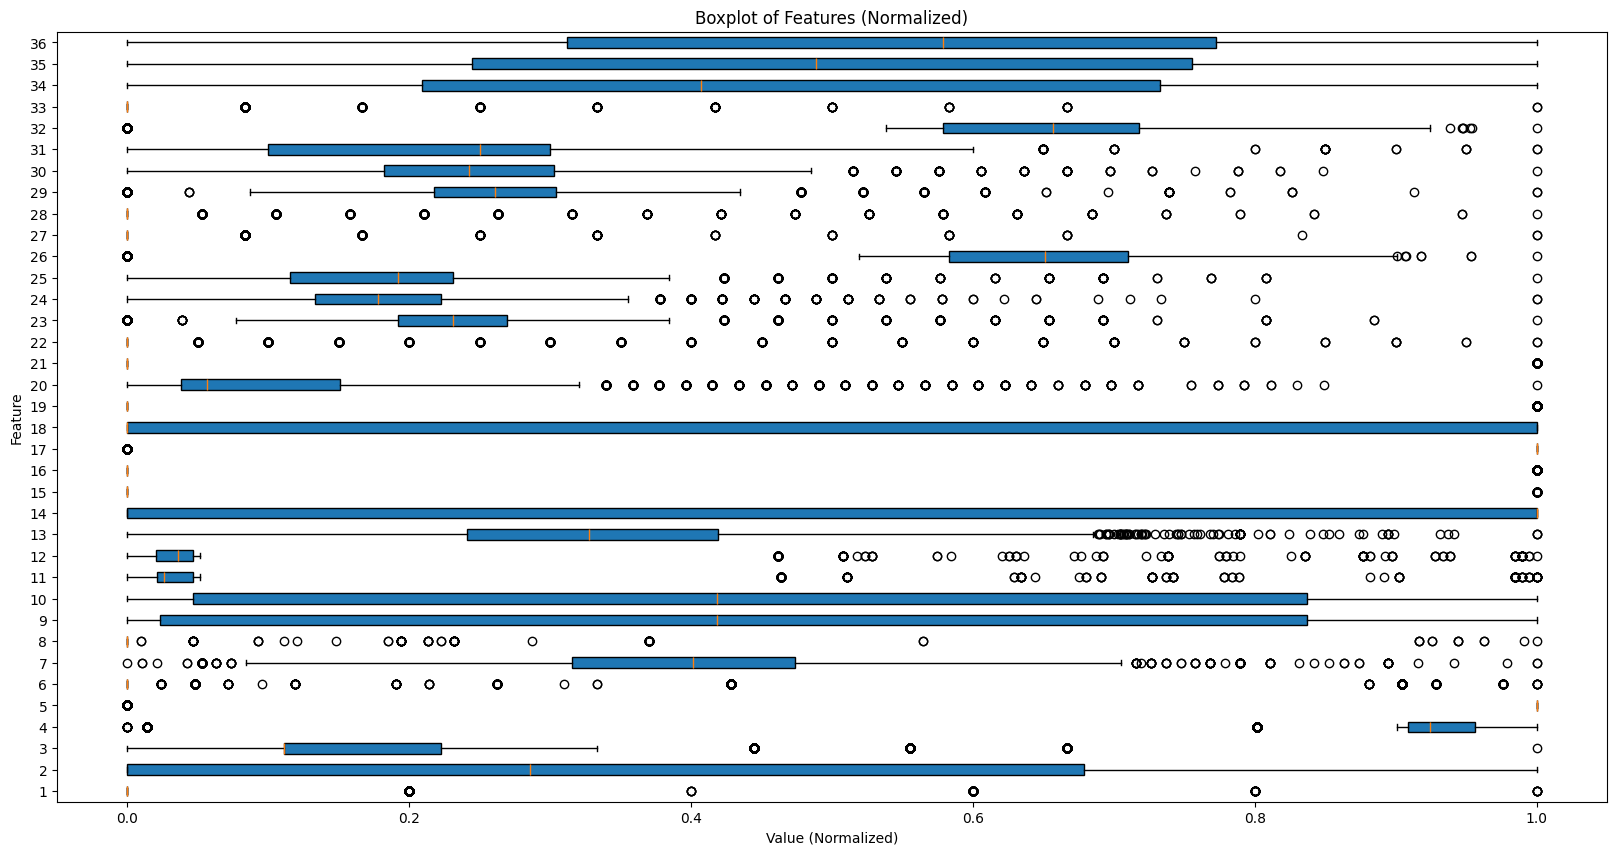

In [81]:
plot_boxplots_Norma(X)

Podemos visualizar con el diagrama de bigotes los valores anómalos y usamos la regla de Tukey para detectar los valores anómalos

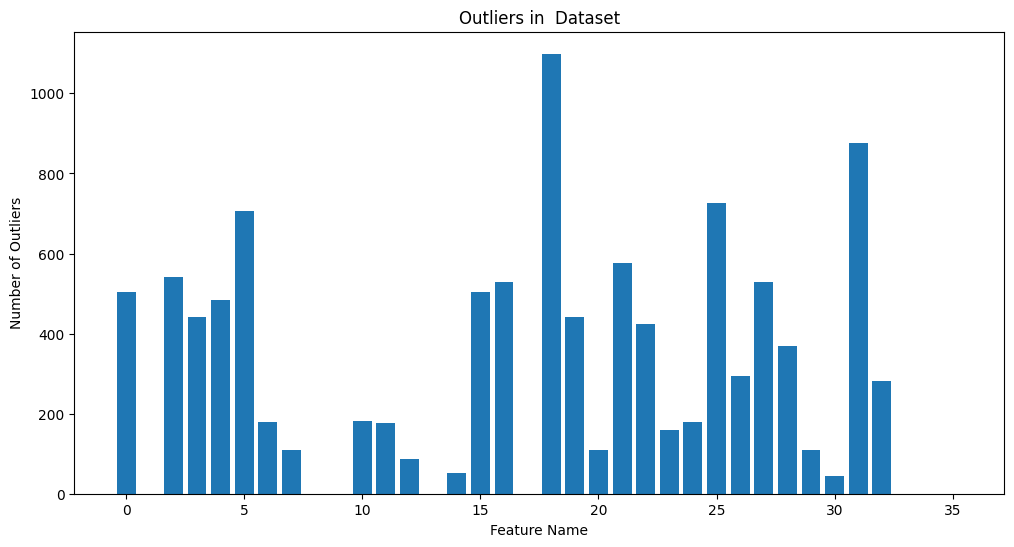

In [82]:
detect_outliers_using_tukey(X)
plot_outliers(detect_outliers_using_tukey(X), "Outliers in  Dataset")

Los gráficos muestran un nº alto de outliers de outliers en algunas de las características del dataset, especialmente en las características con índices alrededor de 15, 20 y 30. El boxplot indica que algunas características presentan una distribución muy sesgada o con valores extremos, lo cual podría no ser ideal en el rendimiento de KNN

  ### Ejercicio 3

Vista general del dataset: 
 - Número de muestras: 4424
 - Número de características: 36
 - Clases únicas: [0 1 2]

Resultados de búsqueda por rejilla y validación cruzada: 
 - Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
 - Best cross-validation accuracy: 0.7242

 Evaluación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       427
           1       0.43      0.26      0.32       238
           2       0.71      0.93      0.80       663

    accuracy                           0.71      1328
   macro avg       0.67      0.61      0.62      1328
weighted avg       0.71      0.71      0.69      1328


 Matríz de confusión:


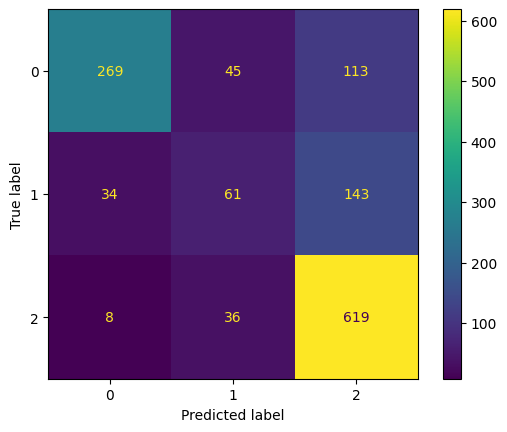

In [83]:
knn_analysis(X,y)

El modelo KNN con los mejores parámetros seleccionados (métrica "manhattan", 11 vecinos, peso por distancia) logró un accuracy de validación cruzada del 72.42%, mientras que el accuracy en el conjunto de prueba fue del 71%. Sin embargo, las métricas de precisión, recall y f1-score varían significativamente entre las clases.

 La clase 2 "graduate" (mayoritariamente correcta) tiene un desempeño sólido (f1-score 0.80), pero las clases 0 "dropout" y 1 "enrolled" muestran dificultades, especialmente la clase 1, con un f1-score de apenas 0.32.



### Ejercicio 4

Vista general del dataset: 
 - Número de muestras: 4424
 - Número de características: 36
 - Clases únicas: [0 1 2]

Resultados de búsqueda por rejilla y validación cruzada: 
 - Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
 - Best cross-validation accuracy: 0.7248

 Evaluación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       427
           1       0.42      0.25      0.32       238
           2       0.72      0.92      0.81       663

    accuracy                           0.72      1328
   macro avg       0.66      0.61      0.62      1328
weighted avg       0.70      0.72      0.70      1328


 Matríz de confusión:


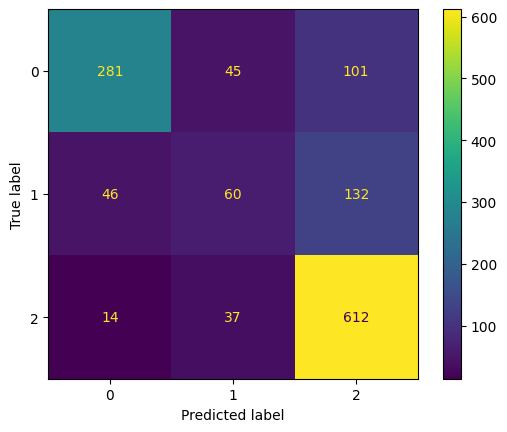

In [ ]:
knn_analysis(X,y, leave_one_out=True)

En este caso, el uso de la validación cruzada Leave-One-Out (LOO) no mostró una mejora significativa en el rendimiento del modelo KNN, con una precisión de validación cruzada que pasó de 0.7242 a 0.7248, y una precisión en el conjunto de prueba apenas mejorando al 72%. Dado el alto costo computacional de LOO y la falta de una mejora notable en el rendimiento, no parece justificado utilizar esta estrategia para este dataset en particular.

### Ejercicio 5

In [84]:
analysis_stratification(X, y, "Students dropout dataset")



Students dropout dataset:
Accuracy sin estratificación: [0.59887006 0.58757062 0.59661017 0.6        0.5938914 ]
Accuracy con estratificación: [0.5920904  0.56836158 0.5819209  0.6079096  0.59162896]


En este caso específico, el método sin estratificación parece funcionar mejor, ya que no solo tiene un mejor promedio de exactitud, sino que también ofrece resultados más consistentes. Sin embargo, la diferencia parece ser muy pequeña.




### Ejercicio 6

Repetimos el experimento, donde se le pasa un grid con únicamente el hiperparámetro K y otro con los hiperparámetros K y weights

In [95]:

# División y normalización
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


perform_grid_search(X_train, y_train, X_test, y_test, param_grid_onlyK, "Students dropout dataset")
perform_grid_search(X_train, y_train, X_test, y_test, param_grid_K_weights, "Students dropout dataset")


Students dropout dataset - Mejores parámetros: {'knn__n_neighbors': 11}
Train Accuracy: 0.7561369509043928
Test Accuracy: 0.7063253012048193

Students dropout dataset - Mejores parámetros: {'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Train Accuracy: 0.7561369509043928
Test Accuracy: 0.7063253012048193



Parece ser que el hiperparámetro de weights por defecto es el mas adecuado y por eso, no se ve ningún cambio aparente, no es relevante en el grid.

### Ejercicio 7




Repetimos el experimento en el que tenemos dos grids, uno con la métrica fija "euclidean" y otro grid probando varias métricas.

In [96]:
perform_grid_search(X_train, y_train, X_test, y_test, param_grid_fixed_metric, "Students dropout dataset")


perform_grid_search(X_train, y_train, X_test, y_test, param_grid_metric, "Students dropout dataset")

Students dropout dataset - Mejores parámetros: {'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Train Accuracy: 0.7561369509043928
Test Accuracy: 0.7063253012048193

Students dropout dataset - Mejores parámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Train Accuracy: 1.0
Test Accuracy: 0.7146084337349398



En este caso parece funcionar mejor cuando tenemos en cuenta la métrica manhattan si nos fijamos en el accuracy del test. Sin embargo, parece que podría estar produciendose algo de overfitting. Vamos a probar a evitar el overfiting probando con 9 vecinos como máximo en el grid.

In [97]:
param_grid_fixed_metric_2 = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean']  # métrica fija
}

param_grid_metric_2 = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


In [99]:
perform_grid_search(X_train, y_train, X_test, y_test, param_grid_fixed_metric_2, "Students dropout dataset")
perform_grid_search(X_train, y_train, X_test, y_test, param_grid_metric_2, "Students dropout dataset")

Students dropout dataset - Mejores parámetros: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Train Accuracy: 0.7593669250645995
Test Accuracy: 0.6987951807228916

Students dropout dataset - Mejores parámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Train Accuracy: 0.7858527131782945
Test Accuracy: 0.7100903614457831



En este caso, parece que no hay overfitting y podemos confirmar la teoría de que añadir varias métricas para este dataset parece obtener un impacto positivo.